In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# מקורי - כולל Artist
df_original = pd.read_csv("../data/Spotify_Youtube.csv")

# מעובד - מוכן מהסשן של B
df_cleaned = pd.read_csv("../output/B_cleaned_ready_for_modeling.csv")

In [10]:
# ודא שקיים בשניהם
df_cleaned["Unnamed: 0"] = df_cleaned["Unnamed: 0"].astype(int)
df_original["Unnamed: 0"] = df_original["Unnamed: 0"].astype(int)

# צירוף לפי מזהה
df_cleaned_with_artist = df_cleaned.merge(df_original[["Unnamed: 0", "Artist"]], on="Unnamed: 0", how="left")

In [11]:
artist_df = df_cleaned_with_artist.groupby("Artist").agg({
    "Target": lambda x: (x == 1).sum(),  # מספר הסינגלים
    "Views": ["mean", "sum"],
    "Likes": "mean",
    "Stream": "mean",
    "Fitness_for_Clubs": "mean",
    "Song_Name_Length": "mean"
})

# שינוי שמות עמודות
artist_df.columns = [
    "Total_Singles", "Avg_Views", "Total_Views", 
    "Avg_Likes", "Avg_Streams", "Avg_Fitness", "Avg_Title_Length"
]

artist_df.reset_index(inplace=True)

In [18]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Drop artists with all-NaN rows
X = artist_df.drop(columns=["Artist"])
X = X.dropna(how='all')  # שורה שבה כל הערכים חסרים

# אימפוטציה לערכים חסרים
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# סקיילינג
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# תוצאה
artist_df = artist_df.loc[X.index]  # התאמה לאורך הנתונים החדשים
artist_df["Cluster"] = clusters
score = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score: {score:.3f}")

Silhouette Score: 0.390


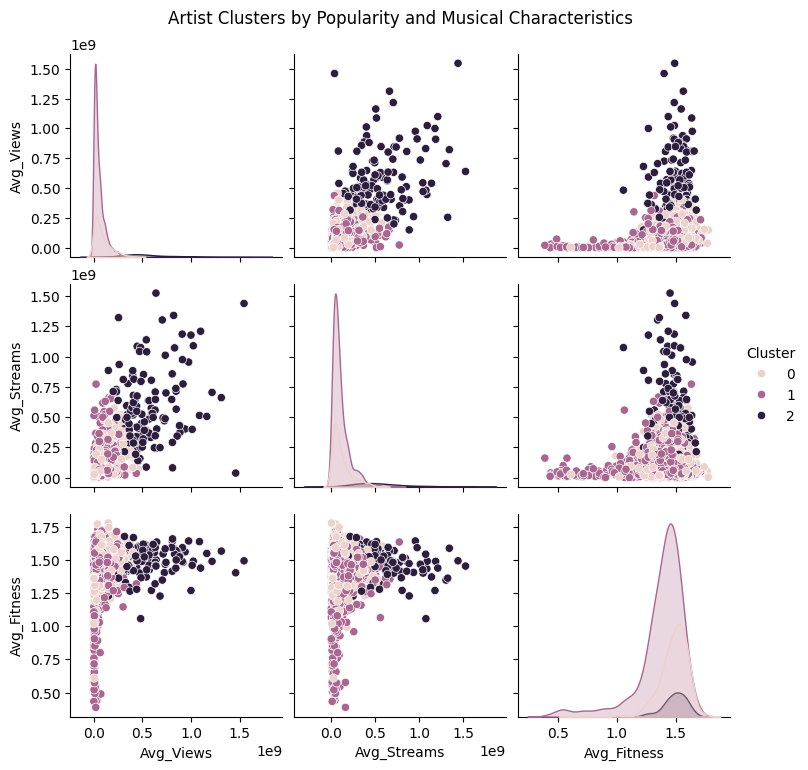

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# ויזואליזציה של הקבוצות לפי ציר עיקרי
sns.pairplot(artist_df, vars=["Avg_Views", "Avg_Streams", "Avg_Fitness"], hue="Cluster")
plt.suptitle("Artist Clusters by Popularity and Musical Characteristics", y=1.02)
plt.show()

## Section E – Exploring Artists 🎤 (Bonus)

### 🔍 Goal

We explored artist-level characteristics by aggregating song-level features.  
Our goal was to identify whether artists can be grouped into meaningful clusters based on their popularity and musical style.

---

### 🛠 Feature Engineering

We created a new dataset (`artist_df`) where each row represents an artist. The aggregated features included:

- `Avg_Views`: Average YouTube views
- `Total_Views`: Sum of YouTube views
- `Avg_Streams`: Average Spotify streams
- `Avg_Likes`: Average YouTube likes
- `Avg_Fitness`: Average "Fitness for Clubs" (engineered feature)
- `Avg_Title_Length`: Average song name length
- `Total_Singles`: Number of singles per artist

We handled missing values using mean imputation and scaled the features using `StandardScaler`.

---

### 🤖 Clustering Algorithm

We applied **KMeans** clustering with `k=3` to the scaled data, based on the assumption that there may be:

- Less popular, low-energy artists
- Mid-tier, balanced artists
- Highly popular, club-friendly artists

Silhouette Score: **0.390**  
This indicates a good degree of separation between the clusters.

---

### 📊 Visual Summary

We plotted the clusters using a pairplot across `Avg_Views`, `Avg_Streams`, and `Avg_Fitness`.  
The clusters showed distinct groupings, with one group having clearly higher popularity and energy values.

---

### 🧠 Takeaways

- Artists can be meaningfully grouped using aggregate song data.
- The most distinct group (Cluster 2) had high views, streams, and club fitness — likely the top-tier commercial artists.
- These insights can be used for artist recommendation, promotion strategies, or automated playlist curation.